# KKT条件

---

今回はKKT条件を説明していきます。

制約付き最適化問題を解く一つの解法がラグランジュ未定乗数法ですが、その式は次のように与えられます。

今回は目的関数がconcaveで制約関数がconvexとします。

$$
L(\mathbf{x}, \lambda)=f(\mathbf{x})-\lambda g(\mathbf{x})
$$

このラグランジュ関数を微分して、0となるところを求めますね。

それがなぜ成り立っているのかがKKT条件でわかります。

---

もし、大域的最適解が制約内にあれば、この問題は制約なしに帰結できます。

しかしながら、そうではないときは制約内から最適解を見つけなければなりません。

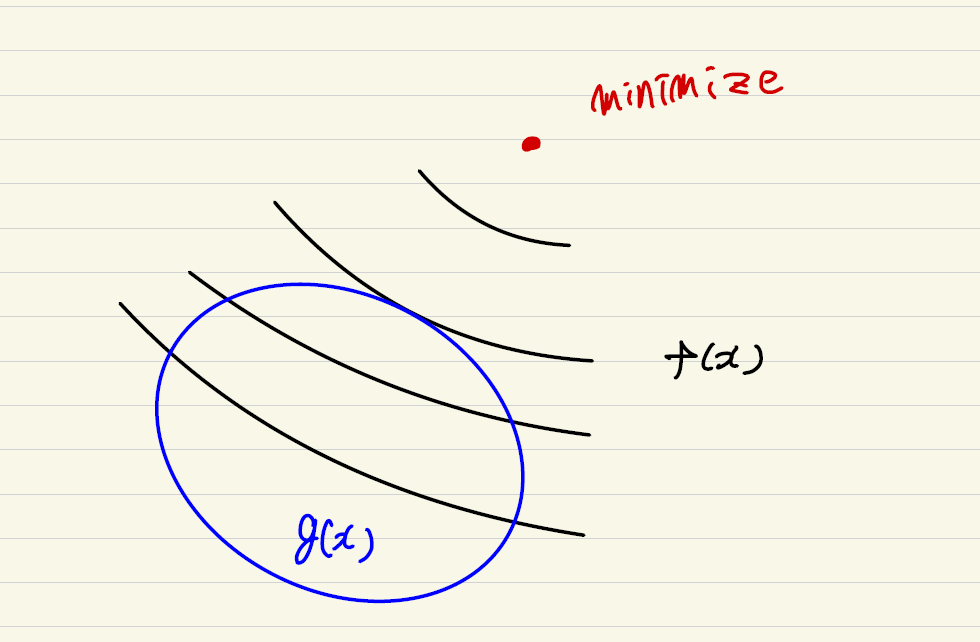

その時の局所最適解は制約関数と目的関数が接しているときが解になります。

接するということは傾きが等しくなりますね。



その時の互いの垂直ベクトルは定数倍を使い等しくなるので次のように表せますね。

$$
\nabla f=\lambda \nabla g
$$

制約内に大域的最適解があれば、上の$\lambda$は0になります。



そして、もう一つの条件は制約条件を満たすことです。

---

次の制約付き最適化問題を解いていきましょう。



目的関数 :
$$
f(x)=3 x^2+\sin (x)
$$

制約条件：
$$
g(x)=3 x-5 \leq 0
$$

ここでこの最適化問題の解を$x^{'}$とすると、先ほどの条件を使うと次が成り立ちます。

$$
\nabla f(x^{'})=\lambda \nabla g(x^{'})
$$

$$
g(x^{'})\leq 0
$$

In [15]:
import numpy as np
from scipy.optimize import minimize

def objective_function(x):
    return 3*x[0]**2 + np.sin(x[0])

def constraint_function(x):
    return 3*x[0] + 10

#ラグランジュ関数
def lagrasian(x,lam):
    return objective_function(x) + lam * constraint_function(x)

#ラグランジュ関数の微分
def lagrange_condition(x):
    lam = x[1]
    eq1 = 6 * x[0] + np.cos(x[0]) + lam* 3
    eq2 = - constraint_function(x[0])
    return [eq1,eq2]

x0 =[0,0] #初期値



constraints = ({'type': 'ineq', 'fun': constraint_function})

result = minimize(objective_function, x0, method='SLSQP', constraints=constraints,options={'disp': True})
print(result)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.082578350729724
            Iterations: 3
            Function evaluations: 10
            Gradient evaluations: 3
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.082578350729724
       x: [-1.645e-01  0.000e+00]
     nit: 3
     jac: [-5.066e-04  0.000e+00]
    nfev: 10
    njev: 3
